In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default font family and dpi
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['figure.dpi'] = 150

In [2]:
# Load data from CSV file
df = pd.read_csv('data.csv', index_col=0, header=[0,1])
df.index.name = 'bin'
df

Adjectives             Adverbs             Nouns         Verbs        \
bin           w–g   w–w   g–g     w–g   w–w   g–g   w–g w–w g–g   w–g   w–w   
bin                                                                           
all          81.0  61.0  63.0    76.0  63.0  56.0    84  57  74  94.0  68.0   
1–10         54.0  54.0  56.0    72.0  56.0  51.0    56  59  57  94.0  55.0   
11–20        68.0  56.0  65.0    68.0  53.0  42.0    60  53  58  94.0  55.0   
21–40        89.0  67.0  54.0    83.0  66.0  71.0    76  53  70  93.0  55.0   
41–80         NaN   NaN   NaN     NaN   NaN   NaN    80  56  69  74.0  64.0   
81–160        NaN   NaN   NaN     NaN   NaN   NaN    90  50  81   NaN   NaN   

              
bin      g–g  
bin           
all     65.0  
1–10    57.0  
11–20   57.0  
21–40   59.0  
41–80   59.0  
81–160   NaN

<AxesSubplot:xlabel='None-bin', ylabel='bin'>

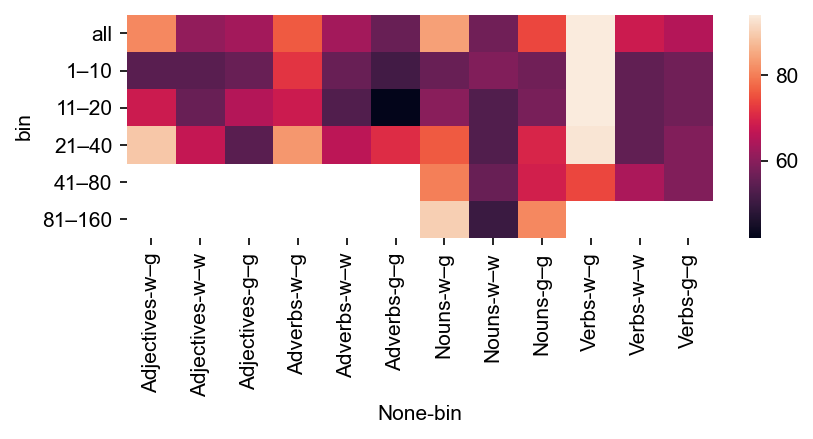

In [3]:
plt.figure(figsize=(16/2.54, 5/2.54))
sns.heatmap(df)

# Updated version 

In [4]:
def annotate_nans(df, label='NA', ax=None, grid=True, **kwargs):
    """Annotate missing values in the heatmap"""
    if ax is None: ax = plt.gca()
    props = dict(va='center', ha='center', fontsize=6, color='0.7')
    props.update(**kwargs)
    na_positions = zip(*np.where(df.isnull()))
    for y, x in na_positions:
        ax.annotate(label, xy=(x+.5, y+.5), **props)
        
    if grid:
        for y in range(len(df)):
            plt.axhline(y, color='0.9', lw=.5, zorder=-1)

In [5]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def annotate_multi_index_columns(df, ax=None, fontsize=6, h=None, number=False):
    """Show a multilevel index above the columns"""
    if ax is None: ax = plt.gca()
    if h is None: h = fontsize
    
    levels0 = df.columns.levels[0]
    levels1 = df.columns.levels[1]
    for i, label0 in enumerate(levels0):
        x0 = len(levels1) * i
        plt.axvline(x0, color='w')
        if number: label0 = f'{alphabet[i]}. {label0}'
        plt.annotate(label0, xy=(x0, 0), 
                     xytext=(2, 2*h), textcoords='offset points', 
                     va='bottom', fontweight='bold',
                     fontsize=fontsize)

        for j, label1 in enumerate(levels1):
            plt.annotate(label1, xy=(x0 + j, 0), 
                     xytext=(2, h), textcoords='offset points', 
                     va='center', ha='left',
                     fontsize=fontsize)

In [6]:
def annotate_index(df, ax=None, fontsize=7, h=None, **kwargs):
    """Annotate the row index"""
    if ax is None: ax = plt.gca()
    if h is None: h = fontsize
    
    max_len = df.index.map(len).max()
    label_x = -4.5 * max_len
    for i, label in enumerate(df.index):
        plt.annotate(label, xy=(0, i + .5), 
                     xytext=(label_x, 0), textcoords='offset points', 
                     va='center', ha='left',
                     fontsize=fontsize)

    plt.annotate(df.index.name, xy=(0, 0), 
                         xytext=(label_x, h), textcoords='offset points', 
                         va='center', ha='left', fontstyle='italic',
                         fontsize=fontsize)

In [7]:
def show_table(df, figsize=(14/2.54, 6/2.54), fontsize=7, cmap='magma', **kwargs):
    props = dict(vmin=0, vmax=100, 
                annot=True, annot_kws=dict(fontsize=fontsize), cbar_kws=dict(fraction=.05))
    props.update(kwargs)
    
    fig, ax = plt.subplots(figsize=figsize, dpi=150, tight_layout=True)
    ax.axis('off')
    sns.heatmap(df, cmap=cmap, ax=ax, **props)
    annotate_multi_index_columns(df, fontsize=fontsize, number=True)
    annotate_index(df, fontsize=fontsize)
    annotate_nans(df, fontsize=fontsize)

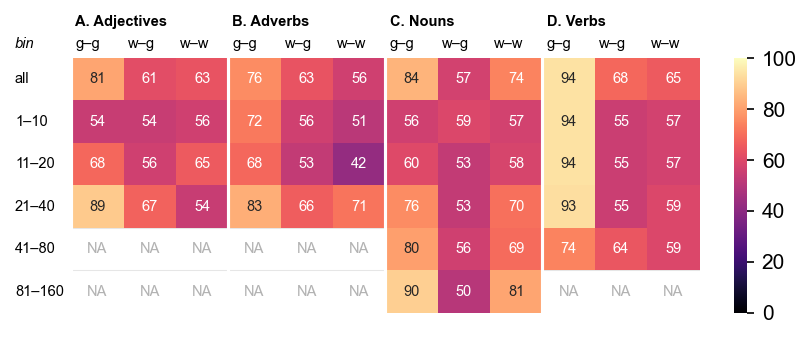

In [8]:
show_table(df)
plt.savefig('example.pdf')

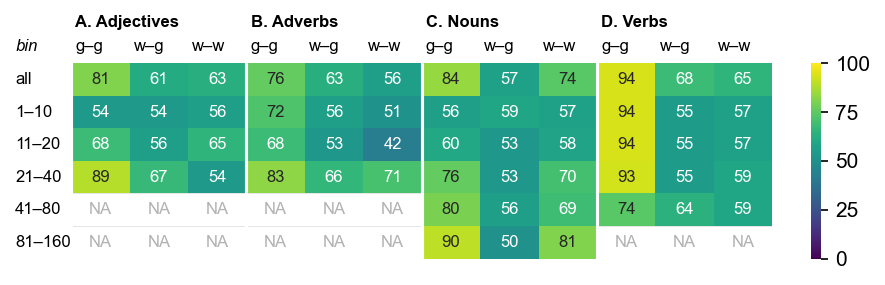

In [9]:
show_table(df, figsize=(6, 2), fontsize=8, cmap='viridis')